### Credit card segmentation Dataset Details
![image](feat.png)

### Goal of a Model
***Advanced data preparation:*** Build an ‘enriched’ customer profile by deriving “intelligent” KPIs such as:

    1- Monthly average purchase and cash advance amount
    
    2- Purchases by type (one-off, installments)
    
    3- Average amount per purchase and cash advance transaction,
    
    4- Limit usage (balance to credit limit ratio),
    
    5- Payments to minimum payments ratio etc.
    
    6- Advanced reporting: Use the derived KPIs to gain insight on the customer profiles.
    
    7- Identification of the relationships/ affinities between services.
    
    8- Clustering: Apply a data reduction technique factor analysis for variable reduction technique and a clustering algorithm  to reveal the behavioural segments of credit card holders
    
    9- Identify cluster characterisitics of the cluster using detailed profiling.
    
    10- Provide the strategic insights and implementation of strategies for given set of cluster characteristics

In [221]:
# importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

warnings.filterwarnings('ignore')

In [2]:
# reading the datasets from the files
data=pd.read_csv("CC_GENERAL.csv")

In [3]:
# displaying the data head
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# details of dataset
records=data.shape[0]
features=data.shape[1]
print("The Number of Records  :",records)
print("The Number of Features :",features)

The Number of Records  : 8950
The Number of Features : 18


In [5]:
# some statistical values from the given dataset
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
# getting information about the features 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
columns=data.columns

In [8]:
# missing values
print("-----------------------NUMBER OF MISSING VALUES FOR EACH ATTRIBUTE----------------------")

for i in columns:
    print(i," :",data[i].isnull().sum())

-----------------------NUMBER OF MISSING VALUES FOR EACH ATTRIBUTE----------------------
CUST_ID  : 0
BALANCE  : 0
BALANCE_FREQUENCY  : 0
PURCHASES  : 0
ONEOFF_PURCHASES  : 0
INSTALLMENTS_PURCHASES  : 0
CASH_ADVANCE  : 0
PURCHASES_FREQUENCY  : 0
ONEOFF_PURCHASES_FREQUENCY  : 0
PURCHASES_INSTALLMENTS_FREQUENCY  : 0
CASH_ADVANCE_FREQUENCY  : 0
CASH_ADVANCE_TRX  : 0
PURCHASES_TRX  : 0
CREDIT_LIMIT  : 1
PAYMENTS  : 0
MINIMUM_PAYMENTS  : 313
PRC_FULL_PAYMENT  : 0
TENURE  : 0


***So there has only 2 features which contains null values***
- Credit Limit
- minimum payments

In [9]:
### Filling the missing values with the mean of respective feature
data.CREDIT_LIMIT.fillna(data.CREDIT_LIMIT.mean(),inplace=True)
data.MINIMUM_PAYMENTS.fillna(data.MINIMUM_PAYMENTS.mean(),inplace=True)

### Deriving the New KPI's
***1.Monthly average Purchases and Cash advance Amounts***

In [10]:
monthly_avg_purchases=data.PURCHASES/data.TENURE
monthly_avg_cash_advance=data.CASH_ADVANCE/data.TENURE

 ***2.Purchases by Type*** .
 
 To find What different type of purchase were made by the customers
- 1. One-Off Purchases .
- 2. Instalment purchases.

There can be customers who can purchase of
- Both types One-off and Installment Purchases.
- Only one-off purchases.
- Only Installment Purchases.
- Neither of any type.

In [11]:
# Finding customers of different types of purchases
type1=data.loc[data.ONEOFF_PURCHASES==0].loc[data.INSTALLMENTS_PURCHASES==0].shape[0]
type2=data.loc[data.ONEOFF_PURCHASES==0].loc[data.INSTALLMENTS_PURCHASES!=0].shape[0]
type3=data.loc[data.ONEOFF_PURCHASES!=0].loc[data.INSTALLMENTS_PURCHASES==0].shape[0]
type4=data.loc[data.ONEOFF_PURCHASES!=0].loc[data.INSTALLMENTS_PURCHASES!=0].shape[0]

In [12]:
# The number of different types of purchased done by the customers
print("The Customers has done different types of purchases ")
print("-------------------------------------------------")
print("")
print("Number of customers has Neither done both type of purchases   :",type1)
print("Number of Customers has done only INSTALLMENT purchases  :",type2)
print("NUmber of Customners has done only ONEOFF purchases      :",type3)
print("Number of Customers has done both types of purchases     :",type4)

The Customers has done different types of purchases 
-------------------------------------------------

Number of customers has Neither done both type of purchases   : 2042
Number of Customers has done only INSTALLMENT purchases  : 2260
NUmber of Customners has done only ONEOFF purchases      : 1874
Number of Customers has done both types of purchases     : 2774


***3.Average Amoun per Purchase and Cash Advance Transaction***

In [13]:
Avg_Am_Pur=data.PURCHASES/data.PURCHASES_TRX
Avg_Am_CashAdvance=data.CASH_ADVANCE/data.CASH_ADVANCE_TRX

***4.Limit Usage***

In [14]:
Limit_Usage=data.BALANCE/data.CREDIT_LIMIT


***5.Payments to Minimum payments ratio***

In [15]:
Pay_min_pay=data.PAYMENTS/data.MINIMUM_PAYMENTS

In [16]:
data.PAYMENTS.describe()

count     8950.000000
mean      1733.143852
std       2895.063757
min          0.000000
25%        383.276166
50%        856.901546
75%       1901.134317
max      50721.483360
Name: PAYMENTS, dtype: float64

***6.Monthly Average Payments***

In [17]:
mont_avg_payments=data.PAYMENTS/data.TENURE

In [18]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [19]:
data.loc[data.MINIMUM_PAYMENTS==data.MINIMUM_PAYMENTS.max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4376,C14499,10571.41107,1.0,7739.48,0.0,7739.48,0.0,1.0,0.0,1.0,0.0,0,44,8000.0,2688.447014,76406.20752,0.0,12


### Advance Reporting:

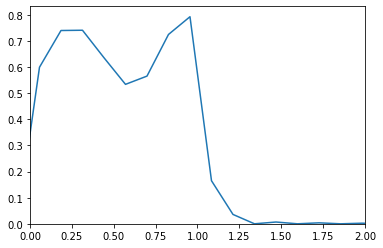

In [20]:
# Limit usage
plt.xlim(0,2)
sbn.kdeplot(Limit_Usage)

- There are some customers in which Limit usage is greater than 1 . represents that they have a balance grater than the credit limit.
- There are some customers who have the Limit usage "0" .i.e they are maintaing credit card properly with out having any balance.
- So final word if Limit Usage has lower value .. then the customers Good Credit Score.
- If Limit usage id higer value . custmores are not maintaining the card usage.

In [21]:
# Payments to minimum payments ratio
Pay_min_pay.describe()

count    8950.000000
mean        9.036121
std       118.176913
min         0.000000
25%         0.907301
50%         2.017230
75%         6.049228
max      6840.528861
dtype: float64

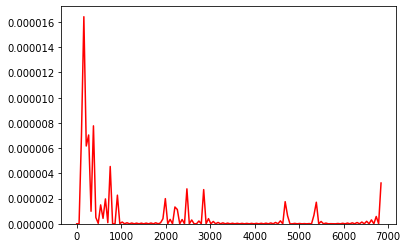

In [22]:
sbn.kdeplot(Pay_min_pay,color="red")

In [23]:
monthly_avg_purchases.describe()

count    8950.000000
mean       86.175173
std       180.508787
min         0.000000
25%         3.399375
50%        31.936667
75%        97.228333
max      4086.630833
dtype: float64

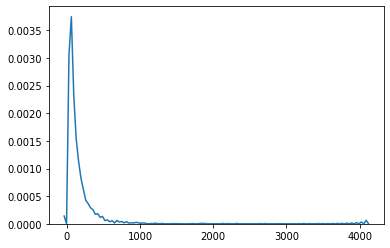

In [24]:
sbn.kdeplot(monthly_avg_purchases)

- Only 25% Customers having the monthly average purchases is greater than the 100.

In [25]:
Avg_Am_Pur.describe()

count    6909.000000
mean             inf
std              NaN
min         0.000000
25%        33.005000
50%        55.458333
75%        94.588442
max              inf
dtype: float64

In [26]:
data.PURCHASES_TRX.describe()

count    8950.000000
mean       14.709832
std        24.857649
min         0.000000
25%         1.000000
50%         7.000000
75%        17.000000
max       358.000000
Name: PURCHASES_TRX, dtype: float64

In [27]:
data.loc[data.PURCHASES!=0].loc[data.PURCHASES_TRX==0]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1458,C11506,4.382924,0.272727,130.24,0.00,152.24,0.0,0.083333,0.000000,0.083333,0.0,0,0,14000.0,28988.973880,1092.184812,0.500000,12
3590,C13691,1.869435,0.454545,0.24,0.24,0.00,0.0,0.083333,0.083333,0.000000,0.0,0,0,3000.0,150.381107,53.294711,0.000000,12
4497,C14622,72.425884,1.000000,655.68,0.00,655.68,0.0,1.000000,0.000000,1.000000,0.0,0,0,1000.0,718.537117,162.732686,0.333333,12


In [28]:
data.loc[data.PURCHASES!=data.ONEOFF_PURCHASES+data.INSTALLMENTS_PURCHASES]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
50,C10052,4931.331857,1.000000,901.42,646.07,255.35,8530.648614,0.625000,0.375000,0.250000,0.875000,37,9,12000.0,8113.297346,1012.415961,0.000000,8
71,C10074,2990.422186,0.909091,4523.27,1664.09,2859.18,27296.485760,0.666667,0.500000,0.583333,0.833333,27,33,7000.0,28232.694460,1107.030803,0.454545,12
82,C10086,3.786310,0.636364,133.05,28.20,104.85,0.000000,0.416667,0.166667,0.250000,0.000000,0,5,12000.0,210.053432,99.533735,0.444444,12
86,C10090,7069.950386,1.000000,1603.78,1445.14,158.64,5626.004046,1.000000,0.833333,1.000000,0.750000,23,23,11000.0,4589.873897,1876.262988,0.000000,12
110,C10115,156.216753,0.818182,1354.86,585.63,769.23,0.000000,0.916667,0.333333,0.833333,0.000000,0,34,5500.0,858.976682,108.319927,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8769,C19008,116.581583,0.818182,1045.14,227.14,818.00,0.000000,0.727273,0.181818,0.545455,0.000000,0,17,9000.0,1258.396242,144.115556,0.333333,11
8825,C19065,72.881984,1.000000,654.84,460.89,193.95,0.000000,1.000000,0.888889,0.888889,0.000000,0,17,1500.0,580.489782,130.035215,0.714286,9
8832,C19073,7.472600,0.333333,63.40,35.09,28.31,0.000000,0.222222,0.111111,0.111111,0.000000,0,2,500.0,83.417439,106.028116,0.000000,9
8834,C19075,191.376930,1.000000,510.00,0.00,780.00,0.000000,0.555556,0.000000,0.444444,0.000000,0,7,1000.0,459.174840,128.231992,0.000000,9


- By Observing the some data insights 
- HEre are some questions arised in my mind was ?
- 1. Why Total purchases doesn't equal to the sum of OneOff purchases and Installement Purchases ?
- 2 How the Purchases were done with out having the purchases Transactions ?


###### Let Doesn't include the Some new Derived KPI's
###### there was avg amount per purchases and avg amount per cash advanceemnt ---> These having the infinte values son don't include them

***Payments to Minimum Payments***

In [29]:
Pay_min_pay.describe()

count    8950.000000
mean        9.036121
std       118.176913
min         0.000000
25%         0.907301
50%         2.017230
75%         6.049228
max      6840.528861
dtype: float64

In [30]:
data.loc[data.PAYMENTS<data.MINIMUM_PAYMENTS]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.00,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.00,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.00,12
10,C10011,1293.124939,1.000000,920.12,0.00,920.12,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1200.0,1083.301007,2172.697765,0.00,12
14,C10015,2772.772734,1.000000,0.00,0.00,0.00,346.811390,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,805.647974,989.962866,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,864.206542,0.00,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6


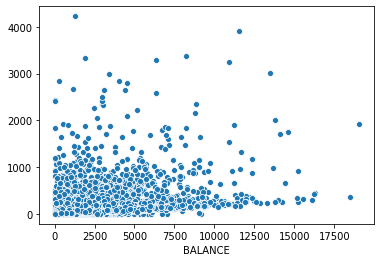

In [31]:
# the relation between the Monthly average balance and the monthly average payments
sbn.scatterplot(data.BALANCE,mont_avg_payments)

- Having the high amount balance and low amonthly average payments.indicates that that the that customers are not well maintained credit score .

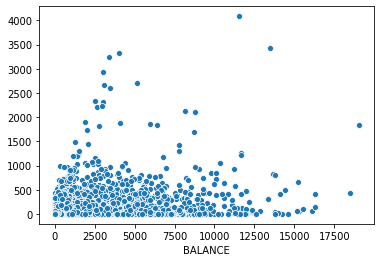

In [32]:
# Relationship Betweent Balance and the Monthly avg purchases
sbn.scatterplot(data.BALANCE,monthly_avg_purchases)

### Preparing the Dataset for the Machine learning Model

***Some derived KPI's for the Machine learning Model***
- Monthly average Purchases
- Monthly average Cash advance 
- Purchase by type 
- Average amout per purchase
- Average amout per cash advance transaction.
- Limit Usage 
- payments to Mininmum payment ratio
- Monthly average payments.


##### Building the Model without adding these derived KPI's

In [33]:
clean_data=data.drop(columns="CUST_ID",axis=1)

In [34]:
# standardize the data so the we can apply the distance based models
sc=StandardScaler()

In [35]:
Norm_form=sc.fit_transform(clean_data)

In [36]:
Norm_form=pd.DataFrame(Norm_form,columns=clean_data.columns)

In [37]:
# split in to training and testing datasets
train_data=Norm_form.iloc[:8000,:]
test_data=Norm_form.iloc[8000:,:]

###  Applying the K-Means Clustering for the Norm_form Dataset.

In [38]:
# Actually we don't know the How many clusters we need so that we have to the clusters by the elbow method
num_clusters=range(1,11)

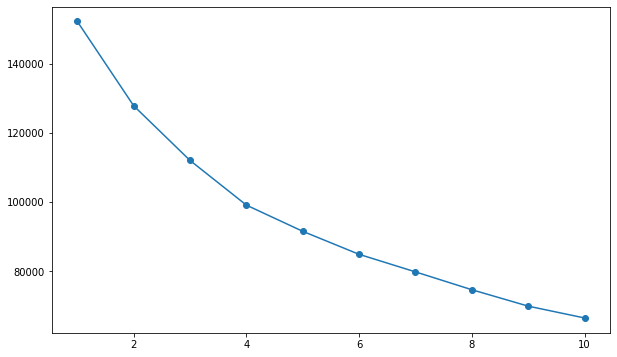

In [39]:
# Evalutation Metrics let take a base on the inertia. metric for the clustering .
# Genereally here we use the Eculidean distance .
Eval_iner=[]
for i in num_clusters:
    model_km_1=KMeans(n_clusters=i,max_iter=300)
    model_km_1.fit(Norm_form)
    Eval_iner.append(model_km_1.inertia_)
plt.figure(figsize=(10,6))
plt.plot(num_clusters,Eval_iner,marker="o")

- By the Elbow method there will be the 4 or 6 or 8 can be the Clusters for the algorithm
- Here it doesn't have Correct Elbow so this we can improve the model by performing feature engineering.

In [229]:
# Now we have to try different Number of clusters .
model_km_Norm=KMeans(n_clusters=4)
model_km_Norm.fit(Norm_form)
labels_form=model_km_Norm.predict(Norm_form)

In [230]:
# To know how the clusters are sepearated
print("The metric values for the  having the  4 clusters :",silhouette_score(Norm_form,model_km_Norm.labels_))

The metric values for the  having the  4 clusters : 0.1976074492720698


***This Shows that have 4 clusters . Inter cluster distance is very low . So that having the 4 cluster not well suited***
- But We are Proceding Furthur to Know How the clusters were seperated

In [41]:
# Number of Clusters is
clean_data["Cluster"]=labels_form

In [42]:
Clustering=clean_data.groupby("Cluster").apply(lambda x:x[clean_data.columns].mean())

In [43]:
# sperate the clusters by each DataFrame .
cluster_0=clean_data.loc[clean_data.Cluster==0]
cluster_1=clean_data.loc[clean_data.Cluster==1]
cluster_2=clean_data.loc[clean_data.Cluster==2]
cluster_3=clean_data.loc[clean_data.Cluster==3]

In [44]:
cluster_0

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.00,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.00,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.00,12,0
8,1014.926473,1.000000,861.49,661.49,200.0,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.00,12,0
9,152.225975,0.545455,1281.60,1281.60,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.00,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8939,728.352548,1.000000,734.40,734.40,0.0,239.891038,0.333333,0.333333,0.000000,0.166667,2,2,1000.0,72.530037,110.950798,0.00,6,0
8943,5.871712,0.500000,20.90,20.90,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6,0
8944,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,864.206542,0.00,6,0
8948,13.457564,0.833333,0.00,0.00,0.0,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6,0


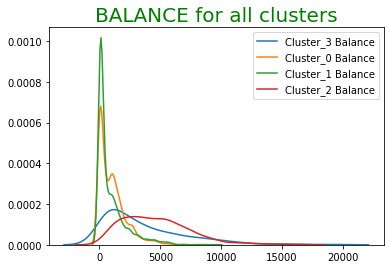

In [45]:
plt.title("BALANCE for all clusters",size=20,color="green")
sbn.kdeplot(cluster_3.BALANCE,label="Cluster_3 Balance")
sbn.kdeplot(cluster_0.BALANCE,label="Cluster_0 Balance")
sbn.kdeplot(cluster_1.BALANCE,label="Cluster_1 Balance")
sbn.kdeplot(cluster_2.BALANCE,label="Cluster_2 Balance")

- The Distribution of the Cluster 0 and 3 are some of Similar i.e There are highly intersecting.
- The Distribution of the Cluster 1 and 2 are have the Similar distribution . These are highly intersecting.
- Mostly there are intersecting

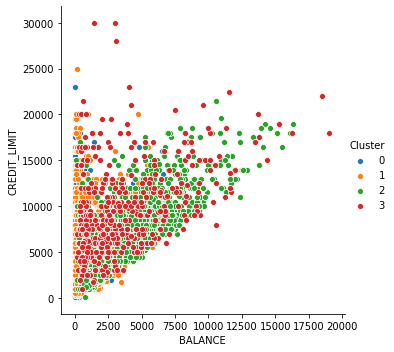

In [46]:
sbn.FacetGrid(data=clean_data,hue="Cluster",height=5).map(sbn.scatterplot,"BALANCE","CREDIT_LIMIT").add_legend()

### Applying PCA for the Dataset

In [56]:
from sklearn.decomposition import PCA

In [57]:
pca=PCA(n_components=2)

In [68]:
new_feat_1=pca.fit_transform(Norm_form.iloc[:,:-1])

In [69]:
new_data=pd.DataFrame(data=new_feat_1,columns=["x1","x2"])

In [70]:
new_data["cluster"]=clean_data.Cluster

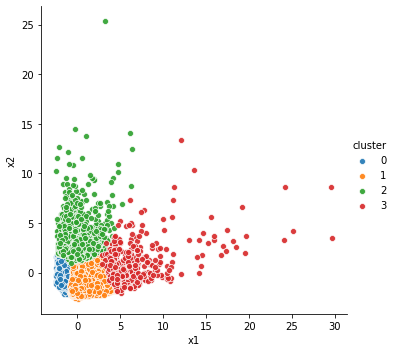

In [79]:
# plotting the points in the clusters 
sbn.FacetGrid(data=new_data,hue="cluster",height=5).map(sbn.scatterplot,"x1","x2",alpha=0.9).add_legend()

- Blue points, green pints and orange points are overlapping....

In [80]:
## Viewing the Clusters through the T-SNE
from sklearn.manifold import TSNE

In [91]:
tsne=TSNE(perplexity=50,n_iter=3000,n_components=2)

In [92]:
new_feat_2=tsne.fit_transform(Norm_form)

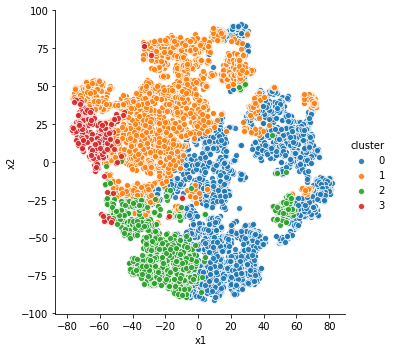

In [93]:
new_data=pd.DataFrame(data=new_feat_2,columns=["x1","x2"])
new_data["cluster"]=clean_data.Cluster
sbn.FacetGrid(data=new_data,hue="cluster",height=5).map(sbn.scatterplot,"x1","x2",alpha=0.9).add_legend()

### Conclusions for the 4 clusters with out adding any New API's

In [169]:
Clustering=Clustering.T

Text(0.5, 1.0, 'Cluster 3')

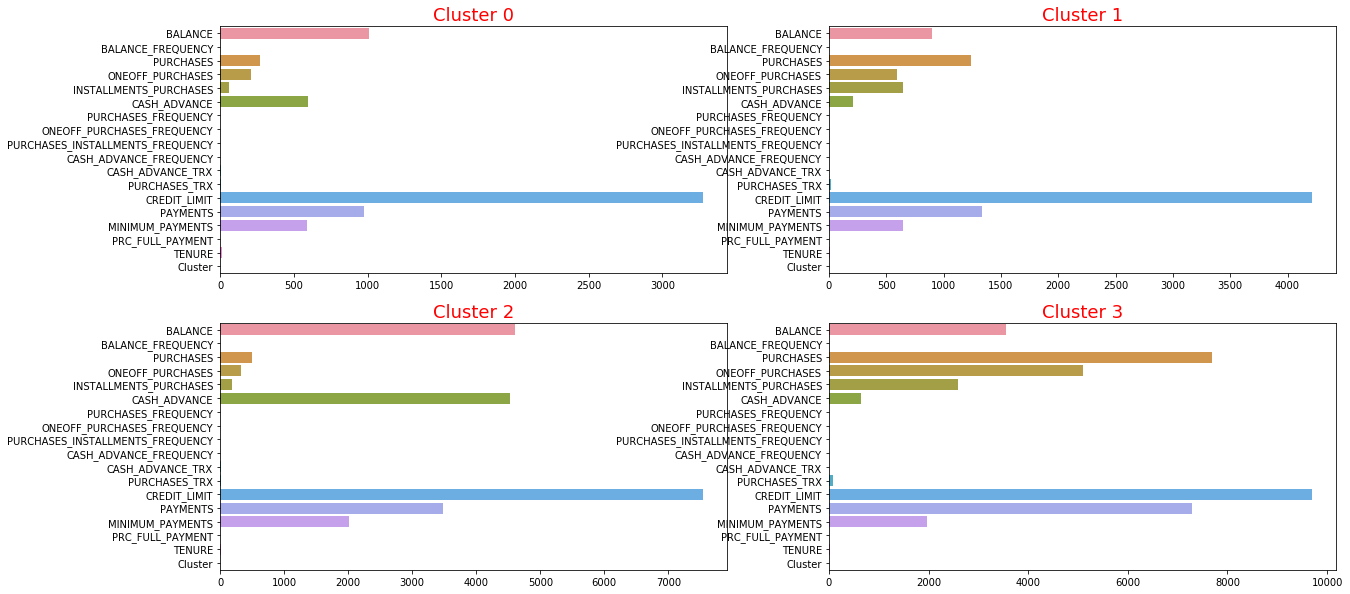

In [220]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(20,10))
k=Clustering[0]
plt.title("Cluster 0",size=15)
sbn.barplot(y=k.index,x=k.values,ax=ax[0,0])
ax[0,0].set_title("Cluster 0",size=18,color="red")
k=Clustering[1]

sbn.barplot(y=k.index,x=k.values,ax=ax[0,1])
ax[0,1].set_title("Cluster 1",size=18,color="red")

k=Clustering[2]
sbn.barplot(y=k.index,x=k.values,ax=ax[1,0])
ax[1,0].set_title("Cluster 2",size=18,color="red")

k=Clustering[3]
sbn.barplot(y=k.index,x=k.values,ax=ax[1,1])
ax[1,1].set_title("Cluster 3",size=18,color="red")


***Summary :***
- ***Cluster 0:*** This group of Customers having low Purchasse i.e the average customers get low installment purchases.Average of customers are maintaining low balance. this group have miniumm payments are low

- ***Cluster 1:*** There is highly overlapping of both cluster 0 and cluster 1 groups . They are sharing similar results

- ***Cluster 2:*** This Cluster of Customers having high Cash_Advance and they are paying high MINIMUM Payments. and But having low purchases.

- ***Cluster 3:*** This cluster of Customers having  high Purchases and High Credit Limit , and also paying high Payments compared to all groups

- Having the 4 Clusters it doesn't give much information and it not well seperated between the clusters...

- Getting some infinity values so we don't add some features are --> Average amout per purchase and Average amount per cash advance transaction.

### Method 1: with out adding New features :
- Just for Experiment to observe the how the clusters will form

In [234]:
# drop the unnessery columsn from the dataset
m1_data=data.drop(columns=["CUST_ID"])

In [259]:
min_scaler=MinMaxScaler()

In [266]:
# standardize the data
stard_data=sc.fit_transform(m1_data)

In [267]:
# converting in to the Dataframe for simplicity
stard_data=pd.DataFrame(data=stard_data,columns=m1_data.columns)

In [268]:
# Checking for the correlation
stard_data.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


- There are so many features are correlated so that we have to remove the highly correlated columns 
- Some Correlated variables are --> ***Purchases*** correlates with ***Oneoff purchases ,Installment Purchases, and Purchase Transaction and also have some not highly corrected with the Payments***.
-  ONeoff correlates with the Purchase Transaction

**If We remove those features will loose some valuable information so that to keep information mostly .we will use the PCA for Compressing the Features**

In [269]:
# to decide how many features will store much information ---> we need to calcute the cummulative sum of vaience 
# That gives the how information information was preserved.
var_list=[]
feats=range(2,len(stard_data.columns)+1)
for i in feats:
    pca=PCA(n_components=i)
    a=pca.fit_transform(stard_data)
    var_list.append(sum(pca.explained_variance_ratio_))

Text(0, 0.5, 'Varience_Ratio')

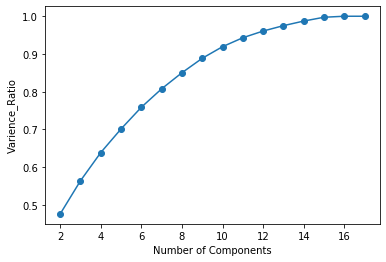

In [270]:
# plotting the varience ration and the Number of components 
plt.plot(feats,var_list,marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Varience_Ratio")

***Using the 10 Components we preserve the >90 % of information .so Here we use the 10 components.***

In [251]:
# so now we use the 10 principal components 
pca=PCA(n_components=10)
new_feat=pca.fit_transform(stard_data)

In [253]:
new_feat.shape

(8950, 10)

In [255]:
# Now bilding the k-means Clustring model for the reduced dimensions 
# For Deciding the Number of CLusters we need by the Elbow method and Silhotte score .
elbow=[]
silhot=[]
num_cluster=range(2,20)
for i in num_cluster:
    model=KMeans(n_clusters=i)
    model.fit(new_feat)
    elbow.append(model.inertia_)
    silhot.append(silhouette_score(new_feat,model.labels_))

Text(0.5, 1.0, 'Elbow Methods  ')

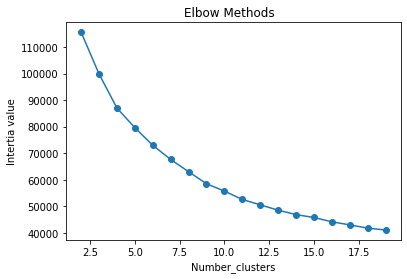

In [257]:
# PLotting the Elbow Methods 
plt.plot(num_cluster,elbow,marker="o")
plt.xlabel("Number_clusters")
plt.ylabel("Intertia value")
plt.title("Elbow Methods  ")

Text(0, 0.5, 'Silchot metric')

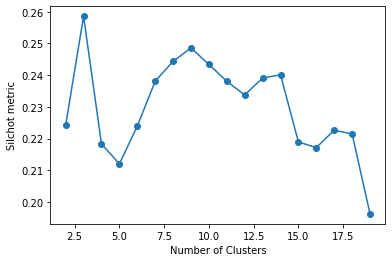

In [258]:
plt.plot(num_cluster,silhot,marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Silchot metric")

***So choosing 8 Clusters will be fine getting some more high inter cluster distance and low intra cluster distance***

In [271]:
model_f1=KMeans(n_clusters=8)

In [272]:
model_f1.fit(new_feat)
labels_f1=model_f1.predict(new_feat)

In [274]:
# So now concatenating with the original data
m1_data["Clusters"]=labels_f1

In [278]:
# For Conclusion we Grouping the customers by their clusters. each feature having their mean values
Clustering_f1=m1_data.groupby("Clusters").apply(lambda x:x[m1_data.columns].mean())

In [286]:
Clustering_f1

Clusters,0,1,2,3,4,5,6,7
BALANCE,106.198653,5046.165682,3727.035228,1271.959917,777.855482,5567.142164,874.390899,1615.463334
BALANCE_FREQUENCY,0.372701,0.968740,0.987666,0.971744,0.955787,0.957273,0.795291,0.974362
PURCHASES,335.697819,529.860585,5972.651224,2115.756468,915.217462,24957.905000,385.851589,241.506194
ONEOFF_PURCHASES,201.223440,326.507096,3483.605990,1673.074685,182.327477,18186.875667,236.354896,192.698731
INSTALLMENTS_PURCHASES,134.723372,203.472541,2490.607734,442.681784,733.337072,6771.029333,149.978234,48.986832
CASH_ADVANCE,303.880077,5278.670110,610.200449,286.791488,210.433999,1858.844605,1132.604828,781.517336
PURCHASES_FREQUENCY,0.267622,0.295443,0.957335,0.886822,0.885818,0.910556,0.408546,0.149920
ONEOFF_PURCHASES_FREQUENCY,0.071849,0.137910,0.650986,0.767254,0.086380,0.773889,0.116514,0.086464
PURCHASES_INSTALLMENTS_FREQUENCY,0.188620,0.196901,0.868533,0.438162,0.839379,0.754444,0.274397,0.064584
CASH_ADVANCE_FREQUENCY,0.030817,0.521179,0.076799,0.054622,0.038839,0.083333,0.198824,0.157170


In [284]:
Clustering_f1=Clustering_f1.T

Text(0.5, 1.0, 'Cluster 7')

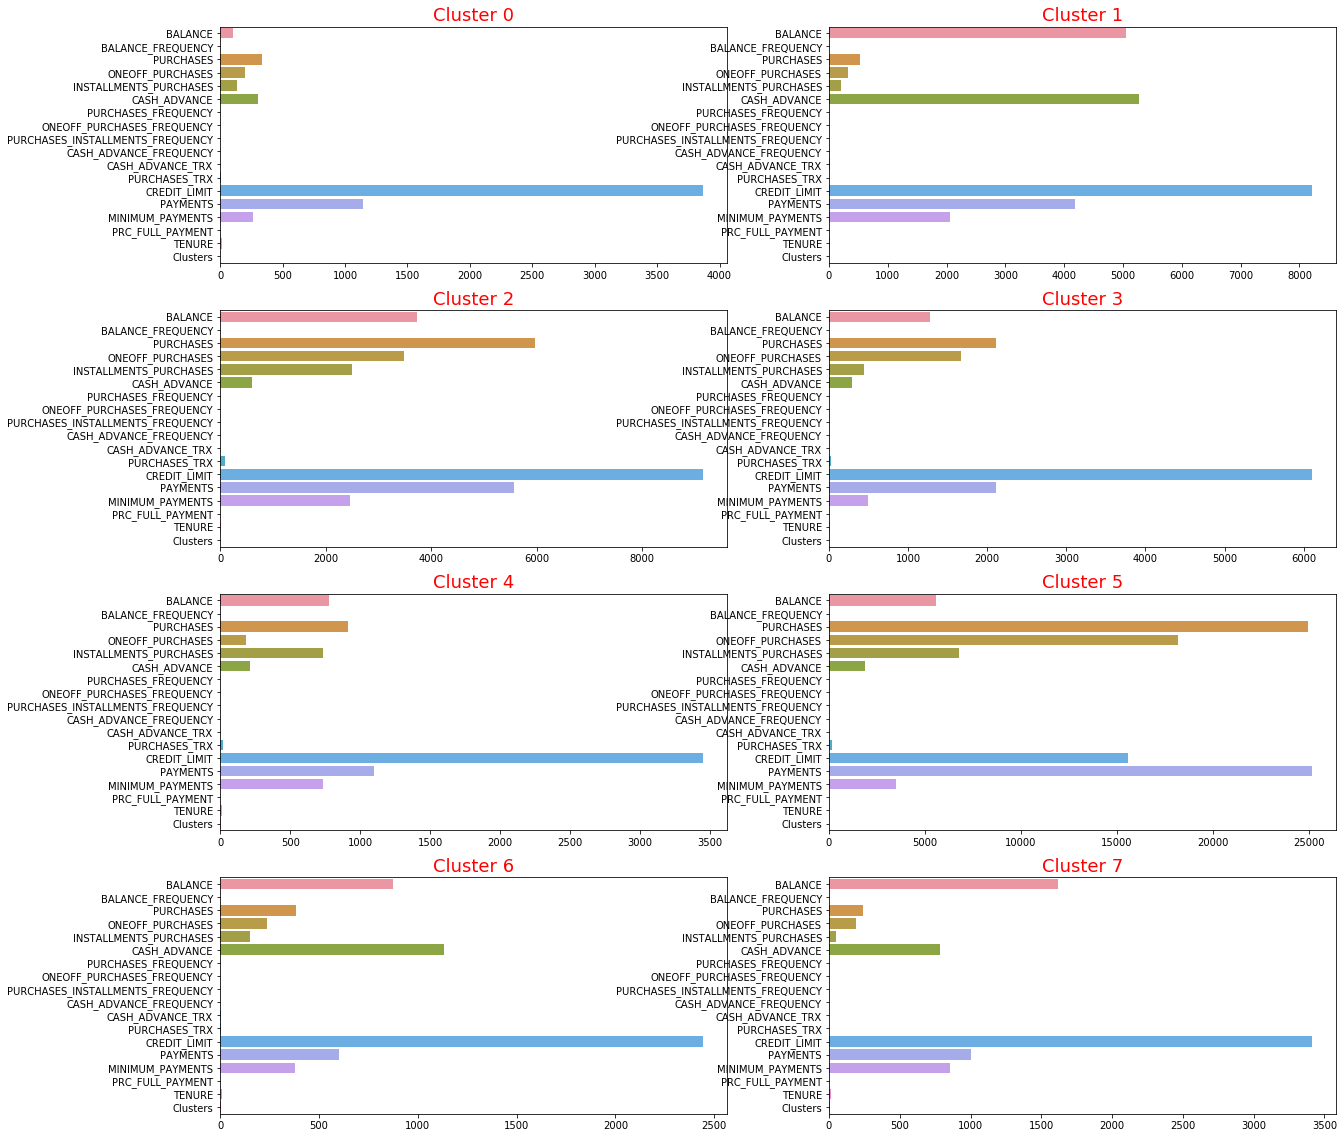

In [287]:
# Plotting the all features with the various clustring 
fig,ax=plt.subplots(nrows=4,ncols=2,figsize=(20,20))
k=Clustering_f1[0]
plt.title("Cluster 0",size=15)
sbn.barplot(y=k.index,x=k.values,ax=ax[0,0])
ax[0,0].set_title("Cluster 0",size=18,color="red")
k=Clustering_f1[1]

sbn.barplot(y=k.index,x=k.values,ax=ax[0,1])
ax[0,1].set_title("Cluster 1",size=18,color="red")

k=Clustering_f1[2]
sbn.barplot(y=k.index,x=k.values,ax=ax[1,0])
ax[1,0].set_title("Cluster 2",size=18,color="red")

k=Clustering_f1[3]
sbn.barplot(y=k.index,x=k.values,ax=ax[1,1])
ax[1,1].set_title("Cluster 3",size=18,color="red")

k=Clustering_f1[4]
sbn.barplot(y=k.index,x=k.values,ax=ax[2,0])
ax[2,0].set_title("Cluster 4",size=18,color="red")

k=Clustering_f1[5]
sbn.barplot(y=k.index,x=k.values,ax=ax[2,1])
ax[2,1].set_title("Cluster 5",size=18,color="red")

k=Clustering_f1[6]
sbn.barplot(y=k.index,x=k.values,ax=ax[3,0])
ax[3,0].set_title("Cluster 6",size=18,color="red")

k=Clustering_f1[7]
sbn.barplot(y=k.index,x=k.values,ax=ax[3,1])
ax[3,1].set_title("Cluster 7",size=18,color="red")

**ConClusions**

    Cluster_0: This group of Customers are Maintaing Low average balance ,Purchases and Low Minimum payments
    Cluster_1: This group of Customenrs are maintaing High Balance,Credit limit also high , Payments also high
               But This group has low purchases
    Cluster_2: customers have high purchases and medium Balance,high payments,low cah advance,high credit                    limit
    Cluster_3: Customers have low balance , low cash advance ,and low minimum payments.
    cluster_4: Compare to balance purchases some of high,any compare to all clusters balace is low 

In [280]:
# Grouping the customers by the Clusters feature with the meadian of the every feature.
Clustering_median=m1_data.groupby("Clusters").apply(lambda x:x[m1_data.columns].median())

In [281]:
Clustering_median

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters
Clusters,,,,,,,,,,,,,,,,,,
0,24.343556,0.363636,168.955,0.00,22.500,0.000000,0.190909,0.000000,0.083333,0.000000,0.0,3.0,3000.0,416.005703,135.712489,0.000000,12.0,0.0
1,4827.491863,1.000000,109.080,0.00,0.000,4322.147833,0.083333,0.000000,0.000000,0.500000,13.5,2.0,8000.0,2363.115410,1453.969299,0.000000,12.0,1.0
2,2891.811559,1.000000,5355.300,2861.45,2025.865,0.000000,1.000000,0.708333,1.000000,0.000000,0.0,79.0,8500.0,4693.693955,910.896331,0.000000,12.0,2.0
3,632.017405,1.000000,1891.845,1364.28,250.300,0.000000,1.000000,0.818182,0.416667,0.000000,0.0,26.0,6000.0,1683.731628,233.632391,0.083333,12.0,3.0
4,279.710324,1.000000,659.295,0.00,533.075,0.000000,1.000000,0.000000,0.916667,0.000000,0.0,14.0,2500.0,764.882523,191.954680,0.083333,12.0,4.0
5,3732.358146,1.000000,22623.405,18504.65,5545.610,0.000000,1.000000,1.000000,0.958333,0.000000,0.0,121.5,16000.0,23773.926225,1320.808042,0.375000,12.0,5.0
6,507.076999,0.857143,167.680,0.00,0.000,477.128277,0.333333,0.000000,0.000000,0.142857,2.0,3.0,1500.0,289.706891,181.654924,0.000000,7.0,6.0
7,1278.829156,1.000000,45.650,0.00,0.000,310.008090,0.083333,0.000000,0.000000,0.090909,2.0,1.0,2500.0,642.558759,456.550057,0.000000,12.0,7.0


In [295]:
# Now coming with some of the columns 
selected_columns=["BALANCE","PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","CREDIT_LIMIT","PAYMENTS","MINIMUM_PAYMENTS"]

In [296]:
Clu_med=Clustering_median[selected_columns]

In [297]:
Clu_med

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
Clusters,,,,,,,
0,24.343556,168.955,0.00,22.500,3000.0,416.005703,135.712489
1,4827.491863,109.080,0.00,0.000,8000.0,2363.115410,1453.969299
2,2891.811559,5355.300,2861.45,2025.865,8500.0,4693.693955,910.896331
3,632.017405,1891.845,1364.28,250.300,6000.0,1683.731628,233.632391
4,279.710324,659.295,0.00,533.075,2500.0,764.882523,191.954680
5,3732.358146,22623.405,18504.65,5545.610,16000.0,23773.926225,1320.808042
6,507.076999,167.680,0.00,0.000,1500.0,289.706891,181.654924
7,1278.829156,45.650,0.00,0.000,2500.0,642.558759,456.550057


Text(0.5, 1.0, 'MINIMUM Payments')

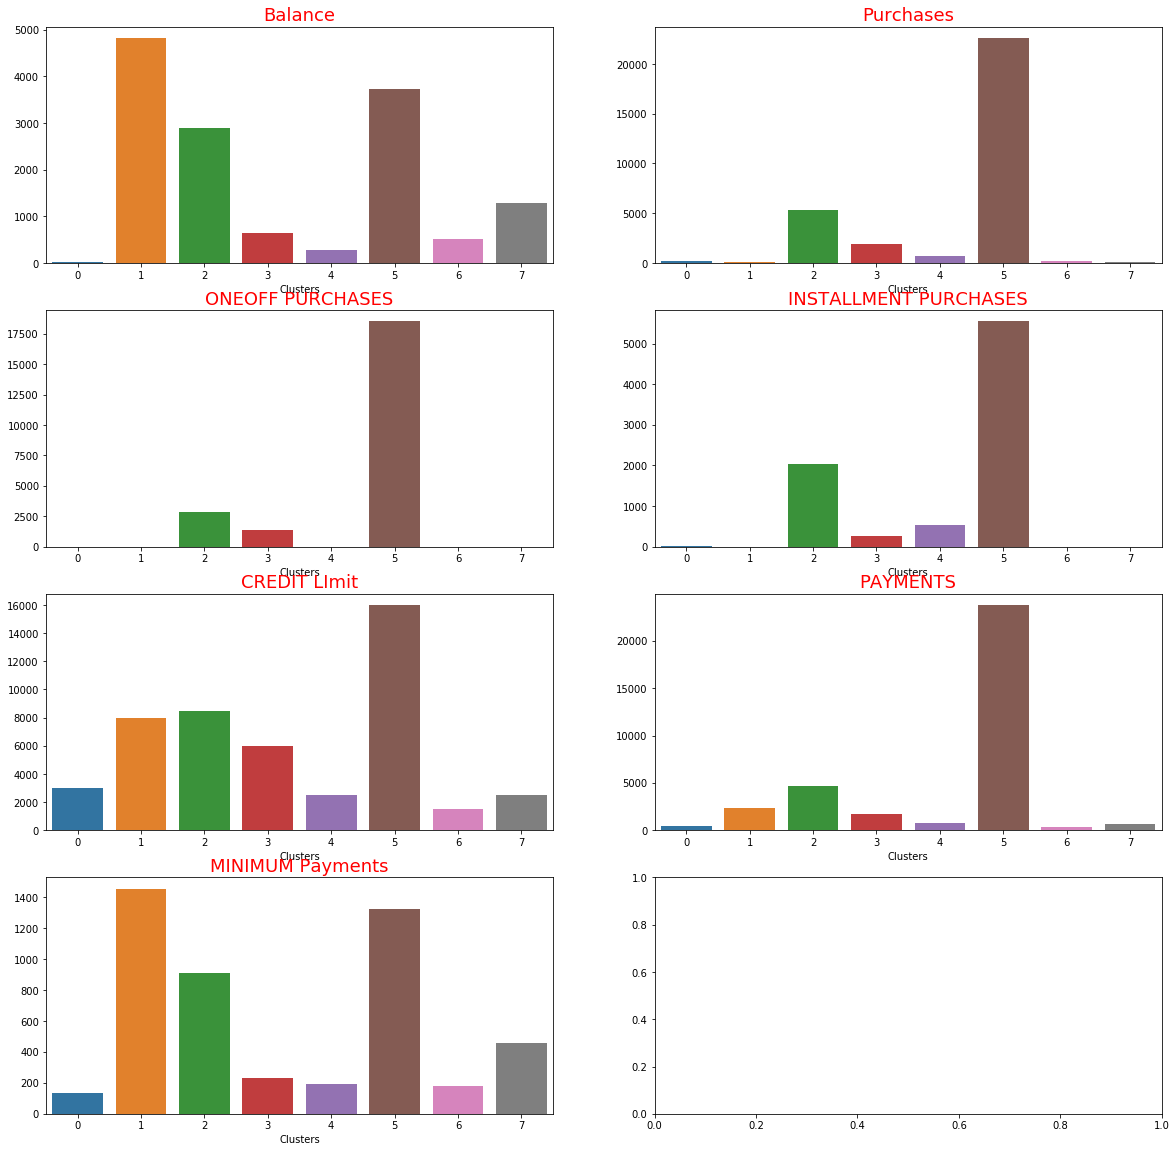

In [300]:
fig,ax=plt.subplots(nrows=4,ncols=2,figsize=(20,20))
k=Clu_med.BALANCE
sbn.barplot(x=k.index,y=k.values,ax=ax[0,0])
ax[0,0].set_title("Balance",size=18,color="red")

k=Clu_med.PURCHASES
sbn.barplot(x=k.index,y=k.values,ax=ax[0,1])
ax[0,1].set_title("Purchases",size=18,color="red")

k=Clu_med[selected_columns[2]]
sbn.barplot(x=k.index,y=k.values,ax=ax[1,0])
ax[1,0].set_title("ONEOFF PURCHASES",size=18,color="red")

k=Clu_med[selected_columns[3]]
sbn.barplot(x=k.index,y=k.values,ax=ax[1,1])
ax[1,1].set_title("INSTALLMENT PURCHASES",size=18,color="red")

k=Clu_med[selected_columns[4]]
sbn.barplot(x=k.index,y=k.values,ax=ax[2,0])
ax[2,0].set_title("CREDIT LImit",size=18,color="red")

k=Clu_med[selected_columns[5]]
sbn.barplot(x=k.index,y=k.values,ax=ax[2,1])
ax[2,1].set_title("PAYMENTS",size=18,color="red")

k=Clu_med[selected_columns[6]]
sbn.barplot(x=k.index,y=k.values,ax=ax[3,0])
ax[3,0].set_title("MINIMUM Payments",size=18,color="red")

#k=Clustering_f1[7]
#sbn.barplot(y=k.index,x=k.values,ax=ax[3,1])
#ax[3,1].set_title("Cluster 7",size=18,color="red")

### Conclusions Of  Feature Medians

Cluster_0 : The Customers have Low Balance, Low Purchases,low payments, Low Minimum payments.

Cluster_1 : The Customers have high Balance,Low Purchases, Average Credit limit, low Payments and High Minumum Payments.

Cluster_2 : The Customents have Average balance compared to the other clusters, medium purchases,credit limit not so high,minimum payments are well maintaining.

Cluster_3 : The Customers have medium purchases,balance,credit limit , payments.

Cluster_4 : Low puchases, low balance , low credit limit ,low purchases,low minimum payments.

Cluster_5 : This group have the high purchase , balance , credit limit , minimum payments, payments.

cluster_6 :Not so less balance , low purchases ,low payments ,low minimum payments.

Cluster_7 : Low puchases, medium balance , low payments ,low credit , not so low minimum payments

### Method 2: Add the new Features to the Dataset

### Preparing the Datasets  
- Now we are adding the New Features to the dataset.

**There are some new features are :**

- 1.   Monthly average Purchases
- 2.    Monthly average Cash advance
- 3.    Purchase by type
- 4.    Average amout per purchase
- 5.    Average amout per cash advance transaction.
- 6.    Limit Usage
- 7.    payments to Mininmum payment ratio
- 8.    Monthly average payments.


In [330]:
m2_data=data.drop(columns="CUST_ID")

In [331]:
# adding new features to the dataset
m2_data["Mon_avg_pur"]=monthly_avg_purchases
m2_data["Mon_avg_cash_adv"]=monthly_avg_cash_advance
m2_data["Limit_Usage"]=Limit_Usage
m2_data["pay_minpay"]=Pay_min_pay
m2_data["Mon_avg_pay"]=mont_avg_payments

In [332]:
# displaying the dataset 
m2_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Mon_avg_pur,Mon_avg_cash_adv,Limit_Usage,pay_minpay,Mon_avg_pay
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.040901,1.446508,16.816840
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.457495,3.826241,341.919383
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.332687,0.991682,51.838895
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,7500.0,0.000000,864.206542,0.000000,12,124.916667,17.149001,0.222223,0.000000,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.681429,2.771075,56.527897


In [334]:
# standardize the data
stard_data=min_scaler.fit_transform(m2_data)

In [335]:
# Convert the standardized data in to the DataFrame
stard_data=pd.DataFrame(data=stard_data,columns=m2_data.columns)

In [336]:
# Check the correlation 
stard_data.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Mon_avg_pur,Mon_avg_cash_adv,Limit_Usage,pay_minpay,Mon_avg_pay
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,...,0.531267,0.322802,0.394282,-0.318959,0.072692,0.179711,0.475431,0.503557,-0.039302,0.319717
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,...,0.095795,0.065008,0.114249,-0.095082,0.119776,0.131281,0.086020,0.404662,-0.088628,0.059540
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,...,0.356959,0.603264,0.093515,0.180379,0.086288,0.995845,-0.055473,-0.057408,0.016721,0.589434
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,...,0.319721,0.567292,0.048597,0.132763,0.064150,0.913060,-0.034545,-0.042212,0.010249,0.554591
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,...,0.256496,0.384084,0.131687,0.182569,0.086143,0.677024,-0.067782,-0.058264,0.020694,0.374717
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,...,0.303983,0.453238,0.139223,-0.152935,-0.068312,-0.047502,0.976364,0.215199,-0.003291,0.464109
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,...,0.119778,0.103464,0.002976,0.305802,0.061506,0.395337,-0.215786,-0.201781,0.011536,0.096462
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,...,0.295030,0.243537,-0.029963,0.157531,0.082466,0.499711,-0.089034,-0.092006,-0.004466,0.236766
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,...,0.060752,0.085551,0.029590,0.250087,0.073275,0.314136,-0.179333,-0.161419,0.018024,0.077837
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,...,0.132616,0.183192,0.097898,-0.249773,-0.133372,-0.116109,0.628312,0.360131,-0.021741,0.195322


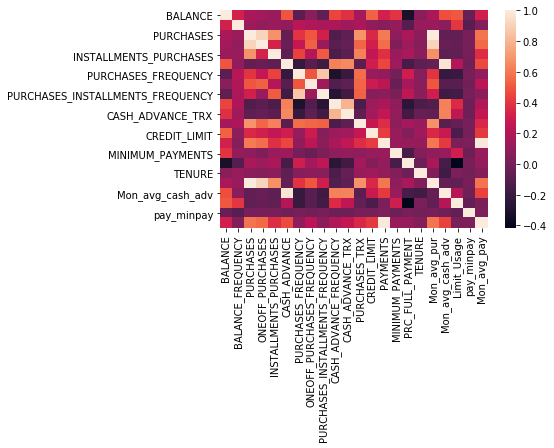

In [337]:
# plotting the correlation between the features
sbn.heatmap(stard_data.corr())

- There are high correlation between the features
- So to remove the highly correlated variable here we apply the PCa

In [338]:
# Checking for the number of principal components are need
var_list=[]
feats=range(2,len(stard_data.columns)+1)
for i in feats:
    pca=PCA(n_components=i)
    a=pca.fit_transform(stard_data)
    var_list.append(sum(pca.explained_variance_ratio_))

Text(0, 0.5, 'Varience_Ratio')

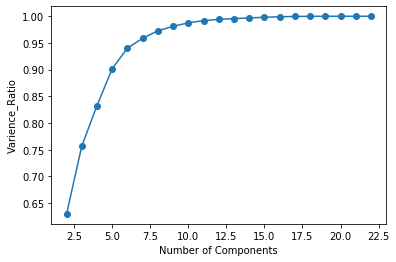

In [339]:
# plotting the varience ration and the Number of components 
plt.plot(feats,var_list,marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Varience_Ratio")

In [340]:
# Take 12 Components which will preserve above 90% of information
pca=PCA(n_components=8)
new_feat=pca.fit_transform(stard_data)

In [341]:
# Now bilding the k-means Clustring model for the reduced dimensions 
# For Deciding the Number of CLusters we need by the Elbow method and Silhotte score .
elbow=[]
silhot=[]
num_cluster=range(2,20)
for i in num_cluster:
    model=KMeans(n_clusters=i)
    model.fit(new_feat)
    elbow.append(model.inertia_)
    silhot.append(silhouette_score(new_feat,model.labels_))

Text(0.5, 1.0, 'Elbow Methods  ')

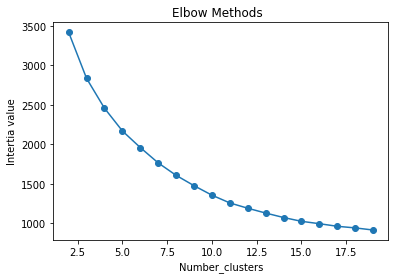

In [343]:
# PLotting the Elbow Methods 
plt.plot(num_cluster,elbow,marker="o")
plt.xlabel("Number_clusters")
plt.ylabel("Intertia value")
plt.title("Elbow Methods  ")

Text(0, 0.5, 'Silchot metric')

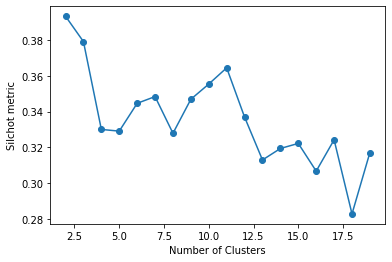

In [344]:
plt.plot(num_cluster,silhot,marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Silchot metric")

- Lets Take 6 clusters for the providing the information

In [345]:
model_f3=KMeans(n_clusters=6)

In [346]:
model_f3.fit(new_feat)
labels_f3=model_f3.predict(new_feat)

In [347]:
m2_data["Clusters"]=labels_f3

In [348]:
Clustering_f3=m2_data.groupby("Clusters").apply(lambda x:x[m2_data.columns].mean())

In [351]:
Clustering_f3=Clustering_f3.T

Text(0.5, 1.0, 'Cluster 5')

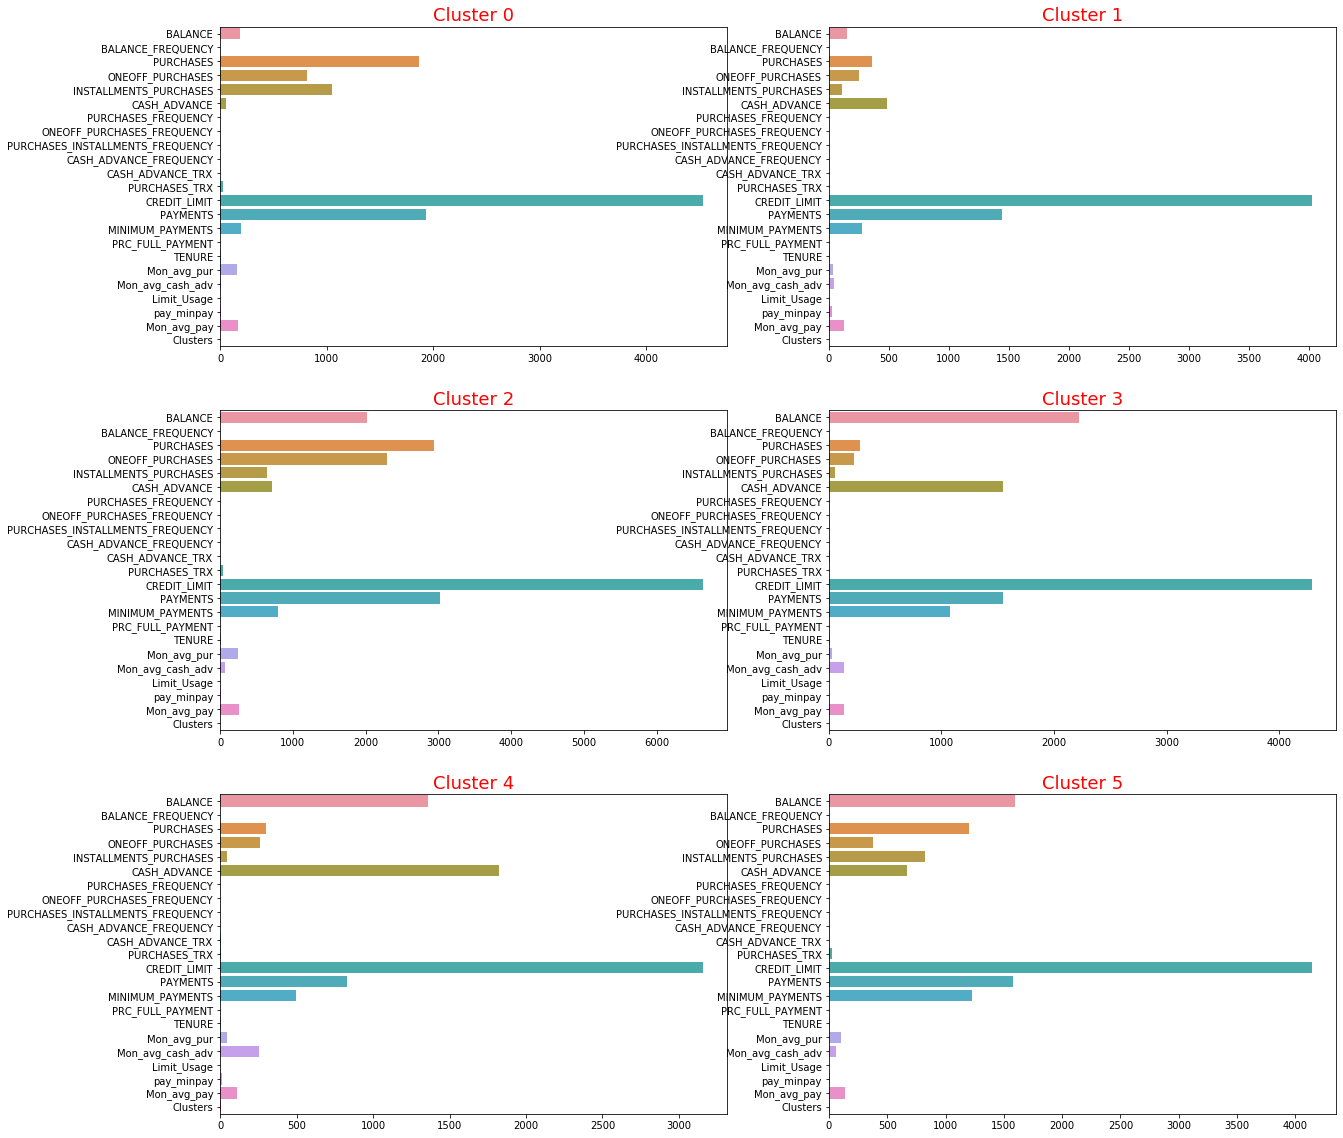

In [353]:
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(20,20))
k=Clustering_f3[0]
plt.title("Cluster 0",size=15)
sbn.barplot(y=k.index,x=k.values,ax=ax[0,0])
ax[0,0].set_title("Cluster 0",size=18,color="red")
k=Clustering_f3[1]

sbn.barplot(y=k.index,x=k.values,ax=ax[0,1])
ax[0,1].set_title("Cluster 1",size=18,color="red")

k=Clustering_f3[2]
sbn.barplot(y=k.index,x=k.values,ax=ax[1,0])
ax[1,0].set_title("Cluster 2",size=18,color="red")

k=Clustering_f3[3]
sbn.barplot(y=k.index,x=k.values,ax=ax[1,1])
ax[1,1].set_title("Cluster 3",size=18,color="red")

k=Clustering_f3[4]
sbn.barplot(y=k.index,x=k.values,ax=ax[2,0])
ax[2,0].set_title("Cluster 4",size=18,color="red")

k=Clustering_f3[5]
sbn.barplot(y=k.index,x=k.values,ax=ax[2,1])
ax[2,1].set_title("Cluster 5",size=18,color="red")



In [354]:
Clustering_f3=Clustering_f3.T

In [364]:
selected_columns=["ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","pay_minpay","Mon_avg_pur","Mon_avg_cash_adv","Mon_avg_pay","Limit_Usage","MINIMUM_PAYMENTS"]

In [365]:
len(selected_columns)

8

Text(0.5, 1.0, 'Minimum payments')

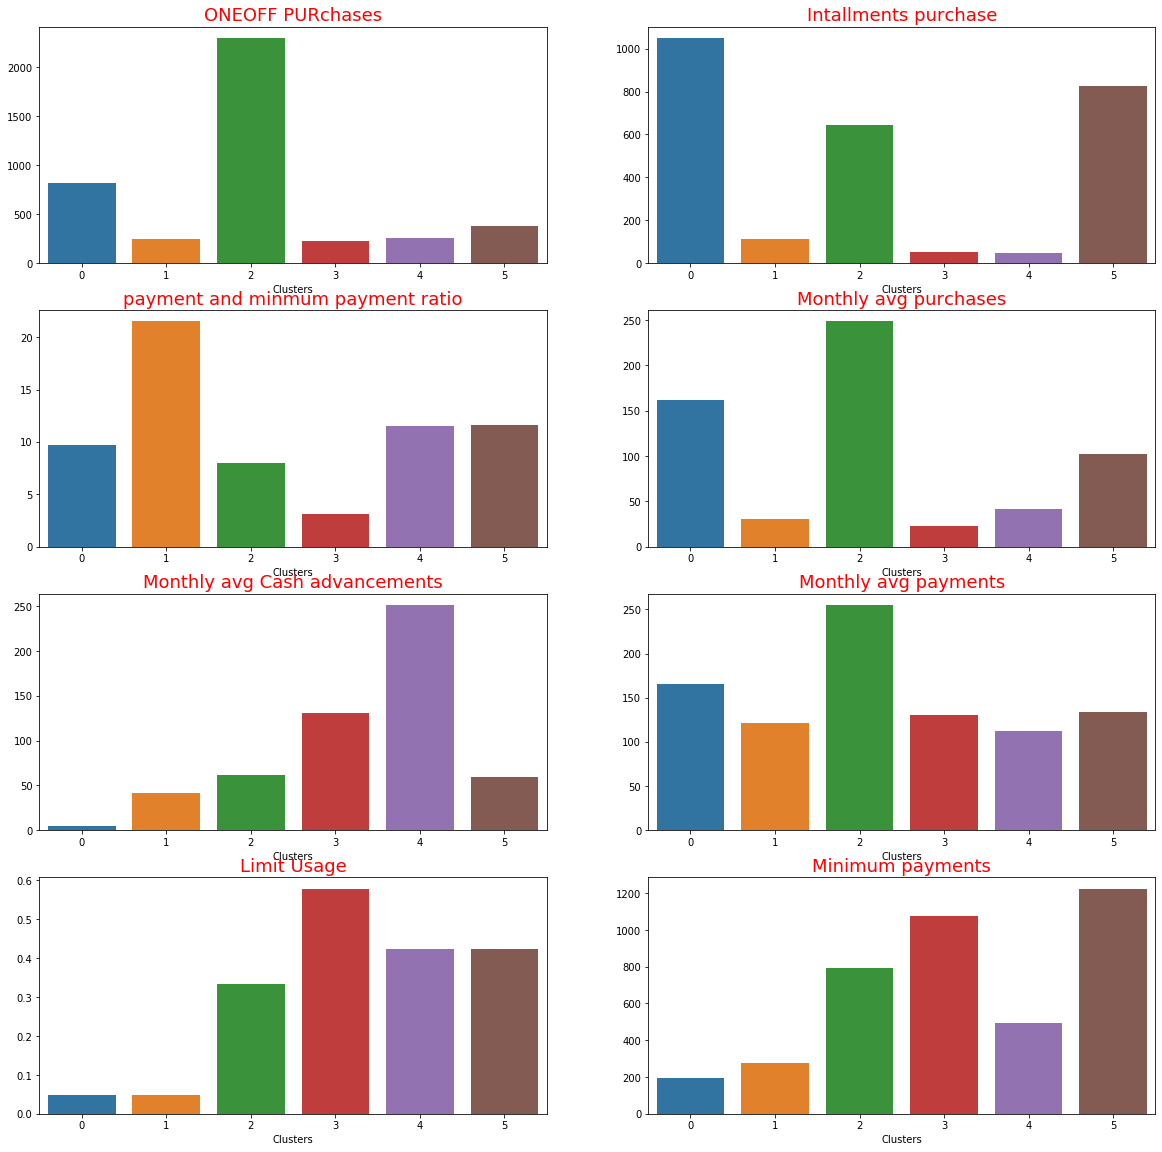

In [368]:
fig,ax=plt.subplots(nrows=4,ncols=2,figsize=(20,20))
k=Clustering_f3[selected_columns[0]]
sbn.barplot(x=k.index,y=k.values,ax=ax[0,0])
ax[0,0].set_title("ONEOFF PURchases",size=18,color="red")

k=Clustering_f3[selected_columns[1]]
sbn.barplot(x=k.index,y=k.values,ax=ax[0,1])
ax[0,1].set_title("Intallments purchase",size=18,color="red")

k=Clustering_f3[selected_columns[2]]
sbn.barplot(x=k.index,y=k.values,ax=ax[1,0])
ax[1,0].set_title("payment and minmum payment ratio",size=18,color="red")

k=Clustering_f3[selected_columns[3]]
sbn.barplot(x=k.index,y=k.values,ax=ax[1,1])
ax[1,1].set_title("Monthly avg purchases",size=18,color="red")

k=Clustering_f3[selected_columns[4]]
sbn.barplot(x=k.index,y=k.values,ax=ax[2,0])
ax[2,0].set_title("Monthly avg Cash advancements",size=18,color="red")

k=Clustering_f3[selected_columns[5]]
sbn.barplot(x=k.index,y=k.values,ax=ax[2,1])
ax[2,1].set_title("Monthly avg payments",size=18,color="red")

k=Clustering_f3[selected_columns[6]]
sbn.barplot(x=k.index,y=k.values,ax=ax[3,0])
ax[3,0].set_title("Limit Usage",size=18,color="red")

k=Clustering_f3[selected_columns[7]]
sbn.barplot(x=k.index,y=k.values,ax=ax[3,1])
ax[3,1].set_title("Minimum payments",size=18,color="red")



### Final Conclusions :


***There are 6 types of customers are have which were took the credit cards***

- Cluster_0 : In this group their purchases are high but mostly are the installment purchases.Monthly average cash advances are very low .Monthly average payments are high, very low Limit usage.i.e they have good credit score.Have Low Minimum Payments . **only 9% customers from total customer base**


- Cluster_1 :In this group also are have the Limit usage is low so their credit score is good. it seems to be have good credit score. But their purchases are very low ,but payment and minimum payment ration is high among all the clusters, monthly avg purchase are low , avgerage payments are ok.
***11% of Customers from total customer base***


- Cluster_2 : In this group Monthly average Purchases are very high that mostly ONE-shot purchases.Monthly average payments are very high compared to all other clusters ,and finally the Limit usage is not so high
**13 % of Customers from total customer base**


- Cluster_3 :In this group have low average Purchases, avg payments are not so well, this group have a very high limit usage.and these have high minimum payments
**36% of Customers from the Total Customer Base**


- Cluster_4 : The Customers are have low purchases,Monthly avg payments are low and mainly monthly average cash advance is high. Limit is Not so high.
**5% of Customer from the Total Customer Base**


- Cluster_5 : The Customers having medium purchase mostly are installment purchases.low monthly cahs advance , but limit usage is in average.these are paying high minimum payments
**23 % of Customers from the Total Customer Base**

### Behaviours of Clusters


    Group_0 : These group of customers are making high purchases transaction and taking low cash  advances and               they are paying low minimum payments . They have good credit score.But this was the 2nd Smallest               group.
    
    Group_1 : These group of Customers are taking low cash advances. high minimum payments compared to cash                 advances..This group making low purchases.
    
    Group_2 : These Customers are making highest monthly average Purchases. payments to minimum payment ration               is low . these are havin low credit score. Seems to be risk takers.
    
    Group_3 : This group making Lowest purchases monthly. Taking high monthly cash advances. but paying the                 highest minimum payments. They having Lowest credit score. This group is in a very risky state. 
              But sadly there are high percentage of customers are come under this group.
              
    Group_4 :Making Low purchases and Taking the maximum cash advance.and paying low minimum payments compared              to cash advance . This group are in 2nd highest limit usage. 
    
    Group_5 :These group making high Installemnt purchases.Taking low cash advances but paying maximu minimum payments.And also credit was not in good.These are in risky state 